In [1]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
# Remove unusual rows of data
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & 
                        (diabetes.Glucose != 0)]
diabetes_mod.shape

(724, 9)

In [3]:
# Features/Response
feature_names = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome
X

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
4,0,137,43.1,2.288
...,...,...,...,...
763,10,101,32.9,0.171
764,2,122,36.8,0.340
765,5,121,26.2,0.245
766,1,126,30.1,0.349


In [71]:
#after the hyper-parameter tuning phase, we’ve selected the logistic regression model with the given hyper-parameters.

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', 
                            solver='liblinear')

In [72]:
#I. Model Evaluation Procedures
#1 Train/Test Split
from sklearn import model_selection #to import train_test_split and cross_val_score
from sklearn import metrics #to import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state = 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy {}".format(accuracy))

Accuracy 0.7955801104972375


In [14]:
#2 K-Fold Cross Validation
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()
print("Accuracy {}".format(accuracy))

Accuracy 0.7790525114155251


In [63]:
#II. Model Evaluation Metrics
#Confusion Matrix
#confusion_matrix from sklearn.metrics
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[108  11]
 [ 26  36]]


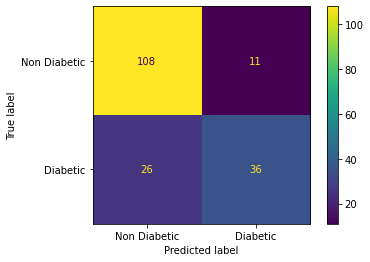

In [46]:
#plot_confusion_matrix from sklearn.metrics
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['Non Diabetic', 
                                                              'Diabetic'])

In [73]:
#Metrics computed from the confusion matrix
"""
NOTE : Choosing which metric to use depends on the business objective or thenature of the problem.
First we’ll parse the obtained confusion matrix
"""
# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
TP

36

In [36]:
#1 Classification accuracy
#the ratio of correct predictions to the total no. of predictions. Method: accuracy_score

print((TP + TN) / (TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.7955801104972375
0.7955801104972375


In [57]:
#2 Sensitivity/Recall
#the ratio of correct positive predictions to the total no. of positive predictions. Method: recall_score 

from sklearn import metrics
print(TP / (TP + FN))
print(recall_score(y_test, y_pred))

0.5806451612903226
0.5806451612903226


In [53]:
#3 Specificity
#the ratio of correct negative predictions to the total no. of negative predictions. No method available

print(TN / (TN + FP))

0.907563025210084


In [54]:
#4 False Positive Rate
#the ratio of negative predictions that were determined to be positive to the total number of negative predictions. No method available

print(FP / (TN + FP))

0.09243697478991597


In [61]:
#5 Precision
#the ratio of correct predictions to the total no. of predicted correct predictions. Method: precision_score 

from sklearn.metrics import precision_score
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106


In [87]:
#III. Adjusting Classification Threshold
"""
We adjust the threshold of a classifier in order to suit the problem we’re trying to solve.After training, the model exposes an 
attribute called predict_proba, which returns the probability of the test data being in a particular response class
"""
# store the predicted probabilities for class 1 (diabetic)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.19914623, 0.29549937, 0.18234743, 0.54417052, 0.67377075,
       0.20325281, 0.25247278, 0.35561517, 0.37169327, 0.30296055,
       0.16669085, 0.41850214, 0.30877612, 0.10389585, 0.20290703,
       0.26936255, 0.46170705, 0.34179316, 0.16210376, 0.21874344,
       0.40230935, 0.15988596, 0.39404616, 0.20598894, 0.65190188,
       0.22479851, 0.38431086, 0.30742568, 0.30108719, 0.64808321,
       0.59854289, 0.2429454 , 0.16441841, 0.25453001, 0.18930141,
       0.44223239, 0.43385549, 0.38264081, 0.22298549, 0.29023489,
       0.4418927 , 0.24341196, 0.21232859, 0.48108705, 0.08501817,
       0.6382392 , 0.5997264 , 0.16403078, 0.31044002, 0.50162331,
       0.20503099, 0.24109771, 0.87318122, 0.1734658 , 0.18207412,
       0.16717741, 0.5982045 , 0.1887179 , 0.94110857, 0.51989603,
       0.4919069 , 0.5377017 , 0.71804099, 0.51598475, 0.47676375,
       0.22421376, 0.53995645, 0.12966959, 0.11849266, 0.28350987,
       0.64704309, 0.15681629, 0.11311328, 0.21661192, 0.49551

Text(0, 0.5, 'Frequency')

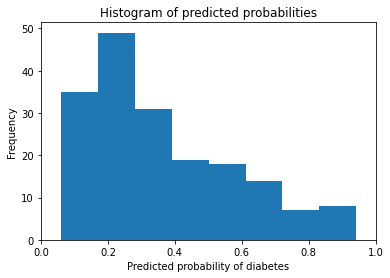

In [70]:
#we’ll plot the probability of becoming diabetic in a histogram.
plt.hist(y_pred_prob, bins=8, linewidth=1.2)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [75]:
"""
Since it’s a binary classification problem, the classification probability threshold is 0.5, which means if the probability is
less than 0.5, it’s classified as “0 (non-diabetic)”. If the probability is more than 0.5, it’s classified as “1 (diabetic)”.
We can use the Scikit-learn’s binarize method to set the threshold to 0.3, which will classify as ‘0 (non-diabetic)’ if the 
probability is less than 0.3, and if it’s greater it will be classified as ‘1 (diabetic)’.
"""
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]
y_pred_class

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.])

In [76]:
# new confusion matrix (threshold of 0.3)
confusion_new = confusion_matrix(y_test, y_pred_class)
print(confusion_new)

[[82 37]
 [ 8 54]]


In [79]:
"""
Next we’ll calculate sensitivity and specificity to observe the changes from the previous confusion matrix calculations. 
Previously the sensitivity calculated was 0.58.
"""
TP = confusion_new[1, 1]
TN = confusion_new[0, 0]
FP = confusion_new[0, 1]
FN = confusion_new[1, 0]
#the sensitivity has increased, which means it’s more sensitive to predict “positive (diabetic)” instances.
print(TP / (TP + FN))
print(recall_score(y_test, y_pred_class))

0.8709677419354839
0.8709677419354839


In [80]:
"""Using the same process, we can calculate the specificity for the new confusion matrix. Previously it was 0.90. We observe
that it has decreased."""
print(TN / (TN + FP))

0.6890756302521008


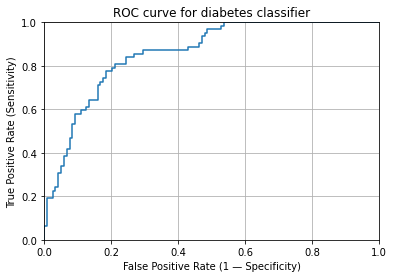

In [89]:
#IV. ROC curve
"""
An ROC curve is a commonly used way to visualize the performance of a binary classifier. The curve plots the True Positive Rate 
(Recall) against the False Positive Rate (also interpreted as 1-Specificity).
"""
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 — Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [98]:
"""
we can use the following method to find the specificity and sensitivity across various thresholds. The following is an example
to show how the sensitivity and specificity behave with several thresholds.
"""
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
evaluate_threshold(0.3)
evaluate_threshold(0.5)


Sensitivity: 0.8709677419354839
Specificity: 0.7058823529411764
Sensitivity: 0.5806451612903226
Specificity: 0.907563025210084


In [101]:
#V. AUC (Area Under the Curve)
#AUC or Area Under the Curve is the percentage of the ROC plot that is underneath the curve. 

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

0.8587693141772839


In [103]:
"""
Also, the cross_val_score method, which is used to perform the K-fold cross validation method, comes with the option to pass 
roc_auc as the scoring parameter. 
"""
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8374390514184398